## Introduction to Image Processing with Python
### Image Processing (RM1-VIS)
### University of Southern Denmark

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import math
import cv2

C:\Users\marij\AppData\Local\Temp\ipykernel_36108\2132591048.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(imGray)


Text(101.5472222222222, 0.5, 'y')

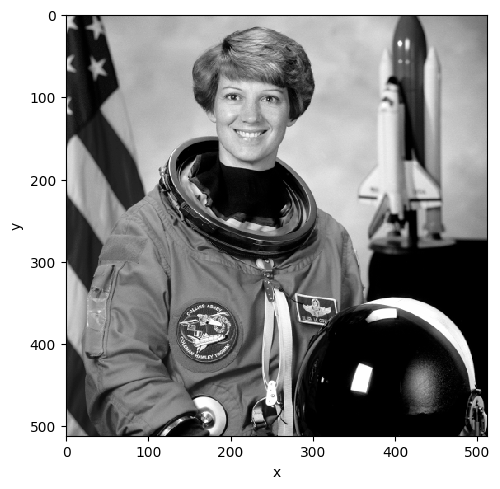

In [72]:
image = skimage.data.astronaut()
imGray = skimage.color.rgb2gray(image)
skimage.io.imshow(imGray)
plt.xlabel('x')
plt.ylabel('y')

### 1. Rotate image in pi/2 steps

In [73]:
# image: input grayscale image
# rot: the number of pi/2 rotations to perform (right-hand coordinate system)
def im_rotate(image, rot):
    rot = rot % 4
    image = np.rot90(image, k=rot)
    return image

C:\Users\marij\AppData\Local\Temp\ipykernel_36108\1995946262.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(im_rotate(imGray, 1))


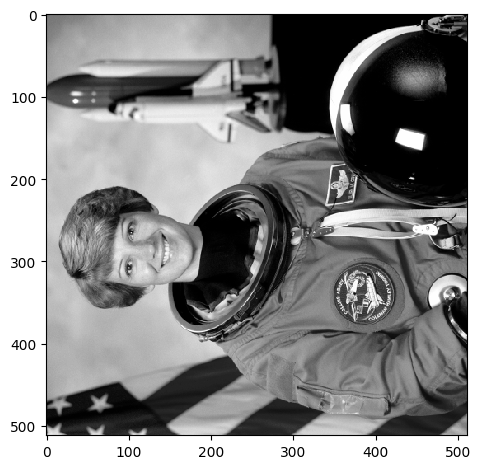

In [74]:
# rotate 90 degrees
skimage.io.imshow(im_rotate(imGray, 1))

C:\Users\marij\AppData\Local\Temp\ipykernel_36108\3256912567.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(im_rotate(imGray, 2))


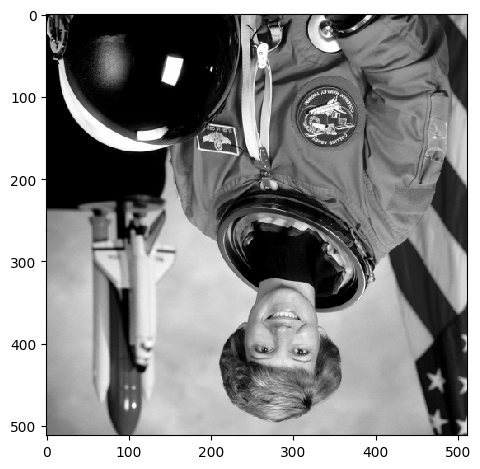

In [75]:
# rotate 180 degrees
skimage.io.imshow(im_rotate(imGray, 2))

### 2. Rotate image with interpolation

Implement a function which rotates grayscale images by a certain angle. Use bilinear interpolation. 

Tip: You can use nearest neighbor interpolation first during development.

In [ ]:
# image: input grayscale image
# angle: the rotation angle in radians (right hand coordinate system)
# padding: the pixel value to use in unoccupied new image regions (background)
def im_rotate(image, angle, padding):
    h, w = image.shape #h - height w - width
    # Find the center of image to rotate around
    #Otherwise in gona rotate around the corner if use h and w
    cy, cx = h/2, w/2
    
    #cos and sin for rotation matrix
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    #rotation matrix
    rot_m = np.array([[cos_a, -sin_a],
                    [sin_a,  cos_a]])
    
    # Create grid of (x,y) coordinates in the output image
    yy, xx = np.indices((h, w)) #xx - every pixel on x axis  yy - every pixel on y axis
    coords = np.stack([xx - cx, yy - cy], axis=-1) #array of every pixel coordinate measured from the image center
    
    #inverse rotation 
    # step to know in what pixel of the original image the new pixel comes from to fill out space 
    src_coords = coords @ rot_m.T # get the possition of every pixel before transformation
    src_x = src_coords[...,0] + cx #... - all rows and columns, 0 - first channel (x coordinates)
    src_y = src_coords[...,1] + cy #... - all rows and columns, 1 - second channel (y coordinates)

    # Bilinear interpolation needs 4 neighboring pixels
    #top-left (x0, y0), top-right (x1, y0), bottom-left (x0, y1), bottom-right (x1, y1).
    x0 = np.floor(src_x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(src_y).astype(int)
    y1 = y0 + 1

    # Clip to image bounds
    x0c = np.clip(x0, 0, w-1)
    x1c = np.clip(x1, 0, w-1)
    y0c = np.clip(y0, 0, h-1)
    y1c = np.clip(y1, 0, h-1)
    
    Ia = image[y0c, x0c]
    Ib = image[y0c, x1c]
    Ic = image[y1c, x0c]
    Id = image[y1c, x1c]

    # Weights
    wa = (x1 - src_x) * (y1 - src_y)
    wb = (src_x - x0) * (y1 - src_y)
    wc = (x1 - src_x) * (src_y - y0)
    wd = (src_x - x0) * (src_y - y0)

    rotated = wa*Ia + wb*Ib + wc*Ic + wd*Id
    
    # Mask out pixels that map outside original image
    outside = (src_x < 0) | (src_x >= w) | (src_y < 0) | (src_y >= h)
    rotated[outside] = padding

    return rotated


C:\Users\marij\AppData\Local\Temp\ipykernel_36108\2633029356.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(im_rotate(imGray, 40 * math.pi/180, 0))


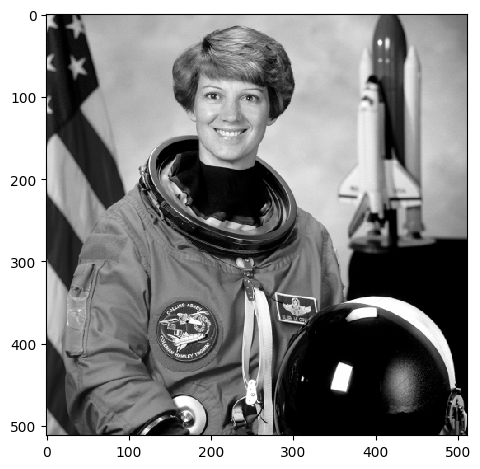

In [77]:
# rotate 40 degrees
skimage.io.imshow(im_rotate(imGray, 40 * math.pi/180, 0))